# EDA Real Estate @ Melbourne
<hr>

## Importing Library and File

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('melb_data.csv')
df.head(2)

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  

[2 rows x 21 columns]

## Checking On Null Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.isna().sum()
# BuildingArea dan YearBuilt Feature terdapat banyak missing data
# CouncilArea feature terdapat sedikit banyak missing data
# Car feature terdapat sedikit missing data

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## 1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait

### Titik Pusat Data (Central Tendency)

- Feature Landsize & Price tidak memiliki missing data dan tipe data float.
- Dalam menentukan titik pusat data untuk tipe data float dapat digunakan 2: mean atau median
- Melakukan pengecekkan apakah terdapat data outliers pada feature Landsize dan Price

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


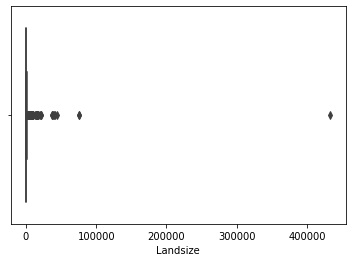

In [6]:
# Cek Outliers pada feature Landsize
sns.boxplot(df['Landsize'])
plt.show()

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


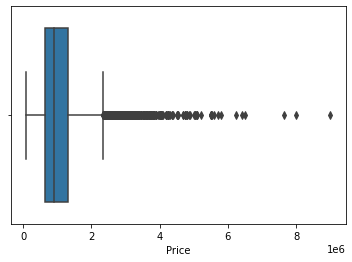

In [7]:
# Cek Outliers pada Feature Price
sns.boxplot(df['Price'])
plt.show()

- Setelah dilakukan pengecekkan, dapat dilihat terdapat banyak data outliers. Sehingga menentukan titik pusat data lebih tepat menggunakan median

In [8]:
# Penentuan titik pusat data untuk feature Landsize
q1_ls = df['Landsize'].quantile(0.25)
q2_ls = df['Landsize'].quantile(0.50)
q3_ls = df['Landsize'].quantile(0.75)
iqr_ls = q3_ls - q1_ls
low_whisker_ls = q1_ls - 1.5*iqr_ls
upper_whisker_ls = q3_ls + 1.5*iqr_ls
print(f'Nilai tengah dari feature Landsize adalah {q2_ls}')
print(f'Nilai bawah dari feature Landsize adalah {q1_ls}')
print(f'Nilai atas dari feature Landsize adalah {q3_ls}')
print(f'Dengan Low Whisker {low_whisker_ls} dan upper whisker {upper_whisker_ls}')

Nilai tengah dari feature Landsize adalah 440.0
Nilai bawah dari feature Landsize adalah 177.0
Nilai atas dari feature Landsize adalah 651.0
Dengan Low Whisker -534.0 dan upper whisker 1362.0


In [9]:
# Penentuan titik pusat data untuk feature Price
q1_p = df['Price'].quantile(0.25)
q2_p = df['Price'].quantile(0.50)
q3_p = df['Price'].quantile(0.75)
iqr_p = q3_p - q1_p
low_whisker_p = q1_p - 1.5*iqr_p
upper_whisker_p = q3_p + 1.5*iqr_p
print(f'Nilai tengah dari feature Price adalah {q2_p}')
print(f'Nilai bawah dari feature Price adalah {q1_p}')
print(f'Nilai atas dari feature Price adalah {q3_p}')
print(f'Dengan Low Whisker {low_whisker_p} dan upper whisker {upper_whisker_p}')

Nilai tengah dari feature Price adalah 903000.0
Nilai bawah dari feature Price adalah 650000.0
Nilai atas dari feature Price adalah 1330000.0
Dengan Low Whisker -370000.0 dan upper whisker 2350000.0


### Insight : Carilah properti dengan harga dengan range AUD 650.000 - 1.330.000 dan luas tanah dengan range 177 - 651 meter persegi

### Persebaran Data (Dispersion)

In [10]:
stdev_landsize = df['Landsize'].std()
stdev_price = df['Price'].std()
mean_landsize = df['Landsize'].mean()
mean_price = df['Price'].mean()

print(f'Standard Deviation dari feature Landsize adalah {stdev_landsize}')
print(f'Standard Deviation dari feature Price adalah {stdev_price}')

print(f'Nilai tengah dari feature Landsize adalah {mean_landsize}')
print(f'Nilai tengah dari feature Price adalah {mean_price}')

Standard Deviation dari feature Landsize adalah 3990.6692411090316
Standard Deviation dari feature Price adalah 639310.724296018
Nilai tengah dari feature Landsize adalah 558.4161266568483
Nilai tengah dari feature Price adalah 1075684.079455081


### Insight : Variasi data luas tanah sangat bervariasi. Hal ini dapat dilihat dengan membandingkan standar deviasinya dengan nilai tengahnya. Oleh karena itu, bijaklah memilih properti sesuai dengan kebutuhan.

### Distribusi Data (Distribution)


C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


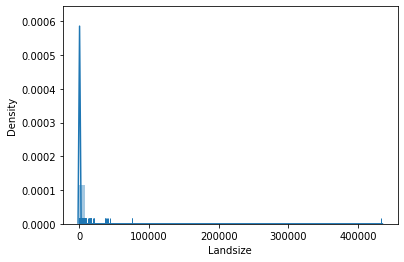

In [11]:
sns.distplot(df['Landsize'], rug = True)
plt.show()

In [12]:
stats.skewtest(df['Landsize']), stats.kurtosistest(df['Landsize'])
# Dapat dilihat pada grafik, data menumpuk pada luas tanah 177 - 651 meter persegi
# Terdapat rumah dengan luas tanah sangat besar. Ada kemungkinan terdapat kekeliruan input data dengan luas tanah lebih besar dari 400.000 meter persegi

(SkewtestResult(statistic=212.046122018087, pvalue=0.0),
 KurtosistestResult(statistic=90.58089860519871, pvalue=0.0))

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


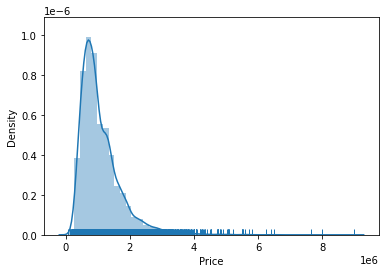

In [13]:
sns.distplot(df['Price'], rug = True)
plt.show()

In [14]:
stats.skewtest(df['Price']), stats.kurtosistest(df['Price'])
# Dapat dilihat pada grafik, data cenderung menumpuk pada harga AUD 650.000 - 1.330.000
# Terdapat rumah dengan harga lebih dari AUD 2.000.000

(SkewtestResult(statistic=67.40991681846009, pvalue=0.0),
 KurtosistestResult(statistic=48.47936685540155, pvalue=0.0))

## 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


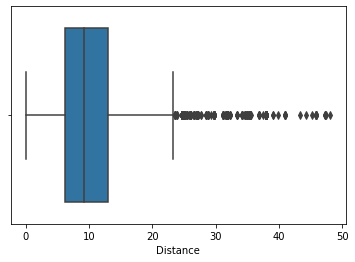

In [15]:
sns.boxplot(df['Distance'])
plt.show()

In [16]:
# Penentuan titik pusat data untuk feature Price
q1_d = df['Distance'].quantile(0.25)
q2_d = df['Distance'].quantile(0.50)
q3_d = df['Distance'].quantile(0.75)
iqr_d = q3_d - q1_d
low_whisker_d = q1_d - 1.5*iqr_d
upper_whisker_d = q3_d + 1.5*iqr_d
print(f'Nilai tengah dari feature Distance adalah {q2_d}')
print(f'Nilai bawah dari feature Distance adalah {q1_d}')
print(f'Nilai atas dari feature Distance adalah {q3_d}')
print(f'Dengan Low Whisker {low_whisker_d} dan upper whisker {upper_whisker_d}')

Nilai tengah dari feature Distance adalah 9.2
Nilai bawah dari feature Distance adalah 6.1
Nilai atas dari feature Distance adalah 13.0
Dengan Low Whisker -4.250000000000002 dan upper whisker 23.35


In [17]:
outliers_distance = df[(df['Distance'] > upper_whisker_d) | (df['Distance'] < low_whisker_d)]['Distance']
outliers_distance

8741     35.2
8742     25.0
8782     34.7
8786     24.7
8787     24.7
         ... 
13540    35.4
13545    31.7
13546    31.7
13547    31.7
13548    31.7
Name: Distance, Length: 411, dtype: float64

### Insight : Pada umumnya properti yang ada berjarak 6 - 13 (meter(?)) dari Central Business District (CBD) di kota Melbourne. Apabila pembeli properti tidak memermasalahkan rumah dengan jarak lebih dari range tersebut, terdapat 411 properti yang memiliki jarak lebih jauh dari CBD

## 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


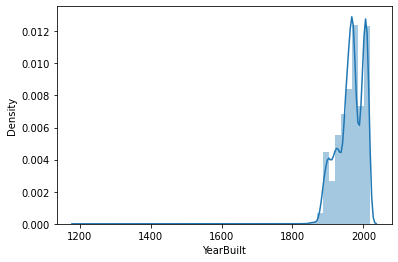

In [18]:
sns.distplot(df['YearBuilt'])
plt.show()

### Insight : Pembangunan properti di Melbourne mulai menggeliat menjelang tahun 1900. Puncaknya terdapat pada tahun 1950an dan di awal 2000. Setelah itu pembangunan mengalami penurunan yang drastis. Pembangunan yang menggeliat ini dikarenakan harga properti pada saat itu naik dengan signifikan. Bagi para pembeli, mencari properti dengan periode pembangunan yang mencapai puncaknya akan memberikan banyak alternatif properti untuk dihuni.

In [31]:
## 4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

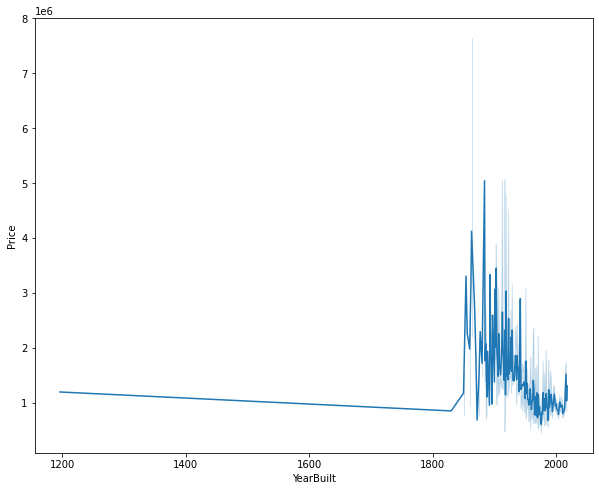

In [19]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df['YearBuilt'], y = df['Price'])
plt.show()

### Insight : Pembangunan properti yang naik secara signifikan tanpa diimbangi permintaan yang bertumbuh akan mengakibatkan meletusnya 'bubble' pada sektor properti. Dapat dilihat di grafik, terdapat penurunan harga yang tajam pada periode pertengahan abad ke 20. Oleh karena itu, bagi para pembeli rumah, disarankan untuk menunggu properti sampai pada titik jenuhnya, dan perlahan harganya akan menurun. Di saat itulah, waktu yang tepat untuk membeli properti. Sedangkan untuk investasi properti dilakukan pada saat animo untuk membeli properti naik.  

## 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [20]:
df_corr = df[['Landsize', 'Distance', 'Rooms', 'Price']]
df_corr

Landsize  Distance  Rooms      Price
0         202.0       2.5      2  1480000.0
1         156.0       2.5      2  1035000.0
2         134.0       2.5      3  1465000.0
3          94.0       2.5      3   850000.0
4         120.0       2.5      4  1600000.0
...         ...       ...    ...        ...
13575     652.0      16.7      4  1245000.0
13576     333.0       6.8      3  1031000.0
13577     436.0       6.8      3  1170000.0
13578     866.0       6.8      4  2500000.0
13579     362.0       6.3      4  1285000.0

[13580 rows x 4 columns]

In [21]:
print(stats.normaltest(df['Price']))
print(stats.normaltest(df['Landsize']))
print(stats.normaltest(df['Distance']))
print(stats.normaltest(df['Rooms']))

# Dapat dilihat pada hasil di bawah, hasil normal test menunjukkan data price, landsize, distance dan rooms tidak terdistribusi secara normal (p di bawah nilai alpha (0.05)). Oleh karena itu untuk menentukan korelasi antar feature tersebut menggunakan spearman method

NormaltestResult(statistic=6894.345896172315, pvalue=0.0)
NormaltestResult(statistic=53168.457055034734, pvalue=0.0)
NormaltestResult(statistic=4806.840514005901, pvalue=0.0)
NormaltestResult(statistic=490.0106096036974, pvalue=3.940470563403166e-107)


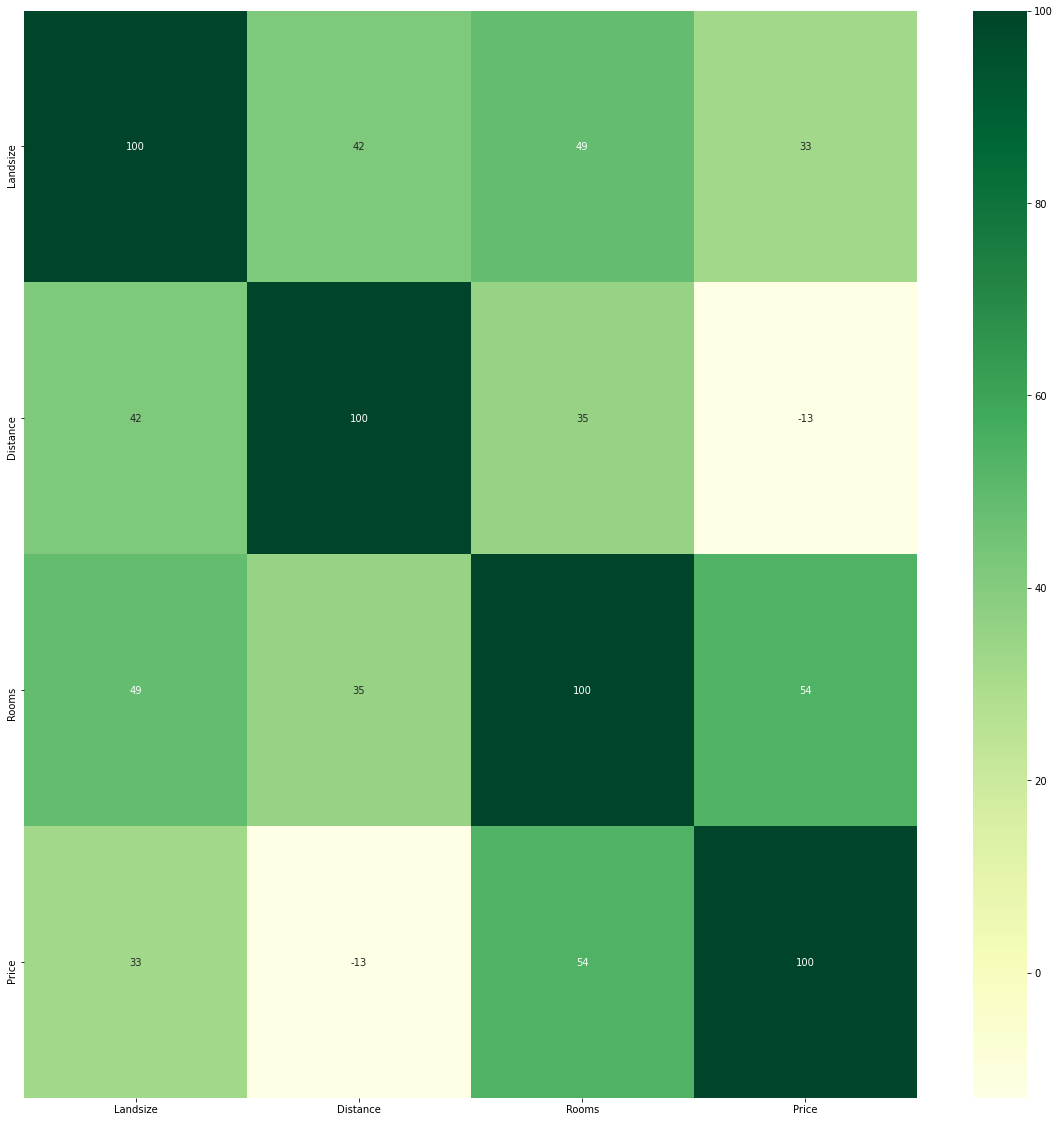

In [22]:
plt.figure(figsize=(20, 20))
corr = df_corr.corr(method = 'spearman')
sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")
plt.show()

### Insight : Dilihat dari grafik di atas, feature rooms paling berkorelasi dengan harga suatu properti. Oleh karena itu, untuk memudahkan pencarian rumah dengan harga yang paling sesuai, pembeli harus menentukan jumlah ruangan yang diperlukan.

## 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:

In [23]:
df_region = df.groupby('Regionname').mean().sort_values('Price', ascending = False)['Price']
df_region = df_region.reset_index()
df_region

Regionname         Price
0       Southern Metropolitan  1.372963e+06
1        Eastern Metropolitan  1.104080e+06
2  South-Eastern Metropolitan  9.229438e+05
3       Northern Metropolitan  8.981711e+05
4        Western Metropolitan  8.664205e+05
5            Eastern Victoria  6.999808e+05
6           Northern Victoria  5.948293e+05
7            Western Victoria  3.975234e+05

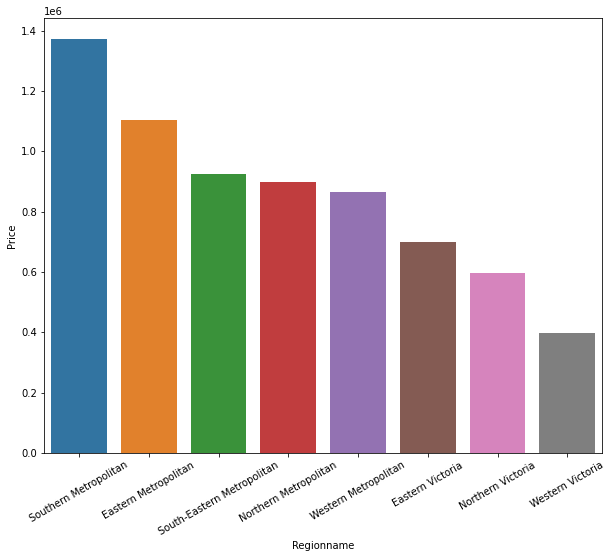

In [24]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Regionname', y = 'Price', data = df_region)
plt.xticks(rotation = 30)
plt.show()

In [25]:
df_SM = df[df['Regionname'] == 'Southern Metropolitan']

### Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!

In [26]:
df_SM.groupby('CouncilArea').mean().sort_values('Price', ascending = False)['Price'].head(5)

CouncilArea
Bayside        1.652168e+06
Boroondara     1.646740e+06
Unavailable    1.325000e+06
Whitehorse     1.297237e+06
Stonnington    1.293382e+06
Name: Price, dtype: float64

### Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!

In [27]:

df_SM.groupby('Type').mean().sort_values('Price', ascending = False)
# Type rumah adalah tipe properti yang memiliki rata - rata harga paling tinggi di Southern Metropolitan


Rooms         Price   Distance     Postcode  Bedroom2  Bathroom  \
Type                                                                       
h     3.371187  1.802241e+06   9.331165  3156.983829  3.331496  1.821022   
t     2.995294  1.205404e+06  10.232706  3158.689412  2.948235  1.948235   
u     1.927695  6.648600e+05   7.342479  3155.699806  1.932214  1.189154   

           Car    Landsize  BuildingArea    YearBuilt  Lattitude  Longtitude  \
Type                                                                           
h     1.810390  569.643881    192.930583  1945.306211 -37.868177  145.041244   
t     1.729412  278.858824    155.111958  1995.771536 -37.879798  145.044892   
u     1.126615  466.380245     81.575838  1975.244878 -37.861363  145.019231   

      Propertycount  
Type                 
h       7178.103271  
t       7336.176471  
u       8481.024532

### Metode penjualan properti (Method) yang paling sering dilakukan!

In [28]:
df_SM.groupby('Method').count().sort_values('Price', ascending = False).head(1)['Price']
# Method penjualan langsung adalah cara yang paling sering digunakan di Southern Metropolitan.

Method
S    3038
Name: Price, dtype: int64

### Insight : Pada Region Southern Metropolitan properti sejenis rumah memiliki harga yang paling tinggi dibandingkan dengan jenis properti lainnya. Jadi apabila ingin membeli properti di SOuthern Metropolitan dengan harga yang lebih terjangkau, bisa membeli sejenis duplex